# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | progreso
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mirnyy
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | hinton
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | belyy yar
Processing Record 16 of Set 1 | houma
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | kuche
City not found. Skipping...
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | carndonagh
Processing Record 21 of Set 1 | saint-am

Processing Record 38 of Set 4 | ayan
Processing Record 39 of Set 4 | hervey bay
Processing Record 40 of Set 4 | svetlogorsk
Processing Record 41 of Set 4 | maceio
Processing Record 42 of Set 4 | paradwip
City not found. Skipping...
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | sept-iles
Processing Record 46 of Set 4 | pecos
Processing Record 47 of Set 4 | ust-maya
Processing Record 48 of Set 4 | nhulunbuy
Processing Record 49 of Set 4 | manali
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | turinsk
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | viligili
City not found. Skipping...
Processing Record 7 of Set 5 | salym
Processing Record 8 of Set 5 | aripuana
Processing Record 9 of Set 5 | aklavik
Processing Record 10 of S

Processing Record 26 of Set 8 | panjab
Processing Record 27 of Set 8 | dalvik
Processing Record 28 of Set 8 | poya
Processing Record 29 of Set 8 | aksarka
Processing Record 30 of Set 8 | raymond
Processing Record 31 of Set 8 | kano
Processing Record 32 of Set 8 | harlingen
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | lagoa
Processing Record 36 of Set 8 | terney
Processing Record 37 of Set 8 | san patricio
Processing Record 38 of Set 8 | torbay
Processing Record 39 of Set 8 | lolua
City not found. Skipping...
Processing Record 40 of Set 8 | sobolevo
Processing Record 41 of Set 8 | lompoc
Processing Record 42 of Set 8 | malm
Processing Record 43 of Set 8 | nome
Processing Record 44 of Set 8 | shieli
Processing Record 45 of Set 8 | arraial do cabo
Processing Record 46 of Set 8 | cidreira
Processing Record 47 of Set 8 | doume
Processing Record 48 of Set 8 | north platte
Processing Record 49 of Set 8 | bambous virieu

Processing Record 18 of Set 12 | oudtshoorn
Processing Record 19 of Set 12 | nuevo progreso
Processing Record 20 of Set 12 | barra patuca
Processing Record 21 of Set 12 | yumen
Processing Record 22 of Set 12 | verkhoyansk
Processing Record 23 of Set 12 | escanaba
Processing Record 24 of Set 12 | vikravandi
Processing Record 25 of Set 12 | dilla
Processing Record 26 of Set 12 | binzhou
Processing Record 27 of Set 12 | paamiut
Processing Record 28 of Set 12 | den helder
Processing Record 29 of Set 12 | jijiga
Processing Record 30 of Set 12 | byron bay
Processing Record 31 of Set 12 | santa marinella
Processing Record 32 of Set 12 | mrirt
City not found. Skipping...
Processing Record 33 of Set 12 | dunedin
Processing Record 34 of Set 12 | cayenne
Processing Record 35 of Set 12 | hamina
Processing Record 36 of Set 12 | morondava
Processing Record 37 of Set 12 | muravlenko
Processing Record 38 of Set 12 | waingapu
Processing Record 39 of Set 12 | kunming
Processing Record 40 of Set 12 | pal

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,progreso,21.2833,-89.6667,89.11,55,1,12.39,MX,1675804301
1,narsaq,60.9167,-46.0500,-3.78,70,0,6.53,GL,1675803832
2,rikitea,-23.1203,-134.9692,78.93,74,93,12.28,PF,1675803788
3,punta arenas,-53.1500,-70.9167,62.62,51,75,18.41,CL,1675803751
4,ribeira grande,38.5167,-28.7000,55.78,66,20,11.01,PT,1675803795


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,progreso,21.2833,-89.6667,89.11,55,1,12.39,MX,1675804301
1,narsaq,60.9167,-46.0500,-3.78,70,0,6.53,GL,1675803832
2,rikitea,-23.1203,-134.9692,78.93,74,93,12.28,PF,1675803788
3,punta arenas,-53.1500,-70.9167,62.62,51,75,18.41,CL,1675803751
4,ribeira grande,38.5167,-28.7000,55.78,66,20,11.01,PT,1675803795


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

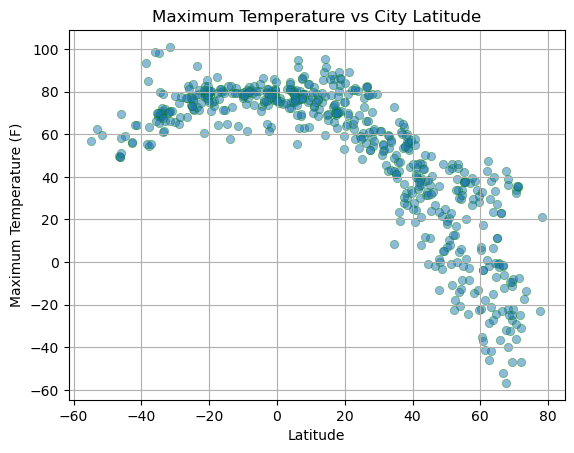

In [84]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="green", linewidth=.5, marker="o",
            alpha=.5, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Maximum Temperature vs City Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

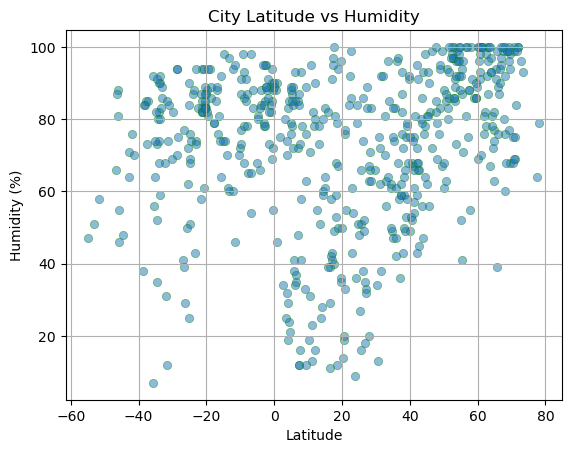

In [52]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(lats,
            humidity,
            edgecolor="green", linewidth=.5, marker="o",
            alpha=.5, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

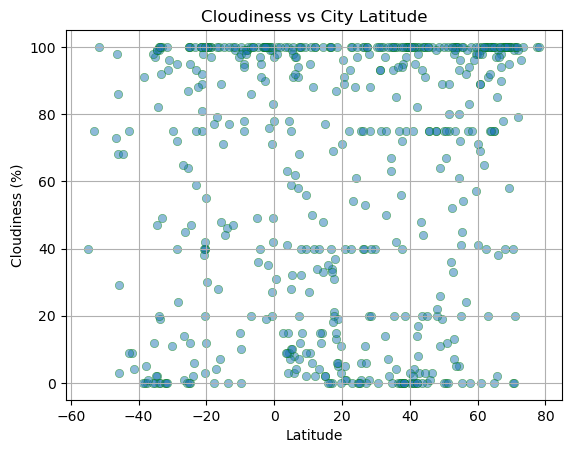

In [76]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(lats,
            cloudiness,
            edgecolor="green", linewidth=.5, marker="o",
            alpha=.5, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Cloudiness vs City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

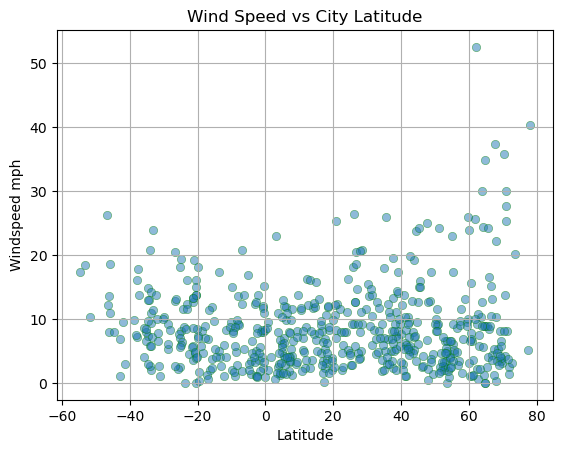

In [79]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="green", linewidth=.5, marker="o",
            alpha=.5, label="Cities")
# Incorporate the other graph properties

plt.title("Wind Speed vs City Latitude")
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_value,y_value,title,coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_value,y_value)
    
    regress_values = x_value * slope + intercept
    
    line_eq = "y = " + str(round(slope,1)) + " x + " + str(round(intercept,1))
    
    # Plot
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq,coordinates, fontsize=10, color="red")
  
    print(f"The r-squared is: {rvalue}")
  

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

N_Hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
N_Hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,progreso,21.2833,-89.6667,89.11,55,1,12.39,MX,1675804301
1,narsaq,60.9167,-46.0500,-3.78,70,0,6.53,GL,1675803832
4,ribeira grande,38.5167,-28.7000,55.78,66,20,11.01,PT,1675803795
5,jamestown,42.0970,-79.2353,46.71,68,100,10.36,US,1675803604
6,cherskiy,68.7500,161.3000,-32.35,99,100,5.37,RU,1675803895


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

S_Hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
S_Hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,78.93,74,93,12.28,PF,1675803788
3,punta arenas,-53.1500,-70.9167,62.62,51,75,18.41,CL,1675803751
7,ushuaia,-54.8000,-68.3000,56.86,47,40,17.27,AR,1675803792
9,mount gambier,-37.8333,140.7667,54.30,85,5,7.20,AU,1675803753
12,avarua,-21.2078,-159.7750,82.45,83,89,12.66,CK,1675803839


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8559240538779882


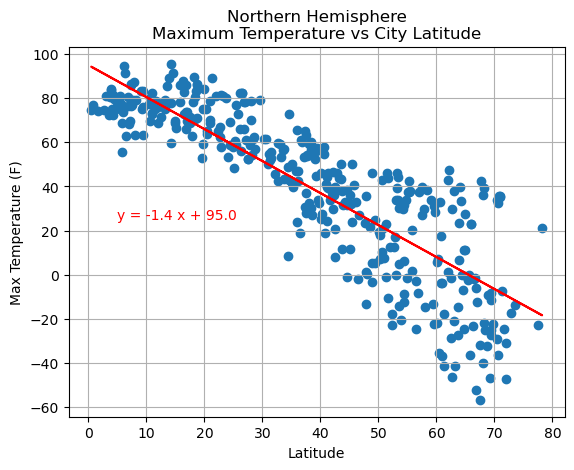

In [88]:
# Linear regression on Northern Hemisphere

plt.title("Northern Hemisphere" "\n" "Maximum Temperature vs City Latitude")

x_value = N_Hemi_df ["Lat"]
y_value = N_Hemi_df ["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

linear_regression(x_value,y_value, 'Max Temp', (5,25))

The r-squared is: 0.4827958130739849


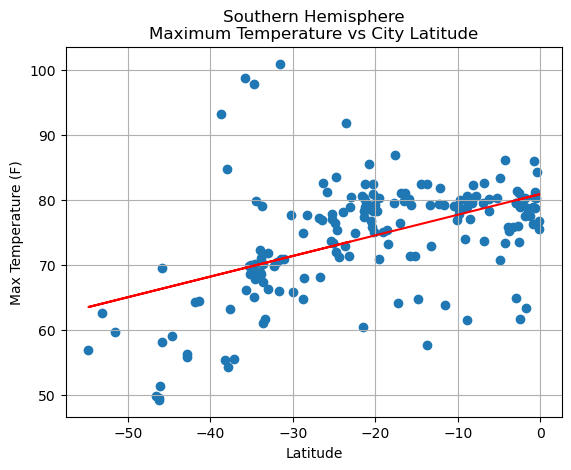

In [99]:
# Linear regression on Southern Hemisphere

plt.title("Southern Hemisphere" "\n" "Maximum Temperature vs City Latitude")

x_value = S_Hemi_df ["Lat"]
y_value = S_Hemi_df ["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

linear_regression(x_value,y_value, "Max Temp", (-30,40))


**Discussion about the linear relationship:** The maximums temperatures seems to have a strong linear relationship with latitudes in the Northern Hemisphere with an r-value of -0.855, while the Southern Hemisphere only shows a slight linear relationship between both variables with an r-value of 0.482.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.497034991179275


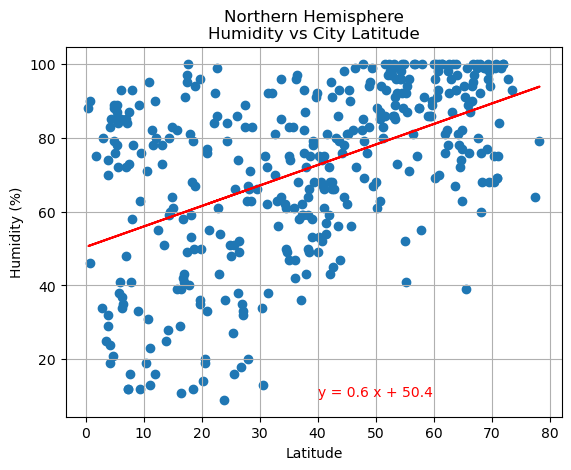

In [106]:
# Northern Hemisphere

plt.title("Northern Hemisphere" "\n" "Humidity vs City Latitude")

x_value = N_Hemi_df ["Lat"]
y_value = N_Hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

linear_regression(x_value,y_value, 'Humidity', (40,10))

The r-squared is: 0.33949456928768285


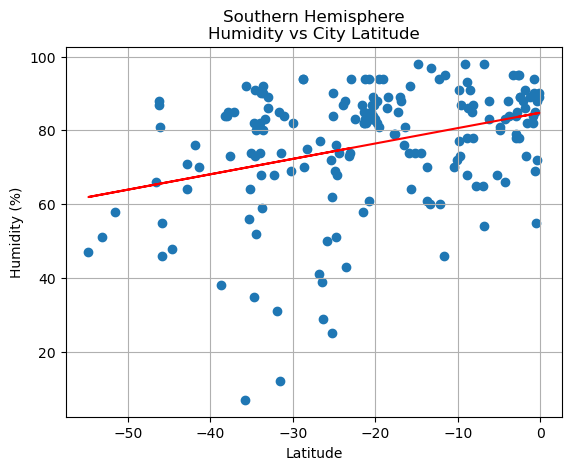

In [105]:
# Southern Hemisphere

plt.title("Southern Hemisphere" "\n" "Humidity vs City Latitude")

x_value = S_Hemi_df ["Lat"]
y_value = S_Hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

linear_regression(x_value,y_value, 'Humidity', (-50,160))

**Discussion about the linear relationship:** Humidity seems to have a stronger linear relationship with latitudes in the Northern Hemisphere with an r-value of 0.497, while the Southern Hemisphere only shows a slight linear relationship between both variables with an r-value of 0.339.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2921101226811343


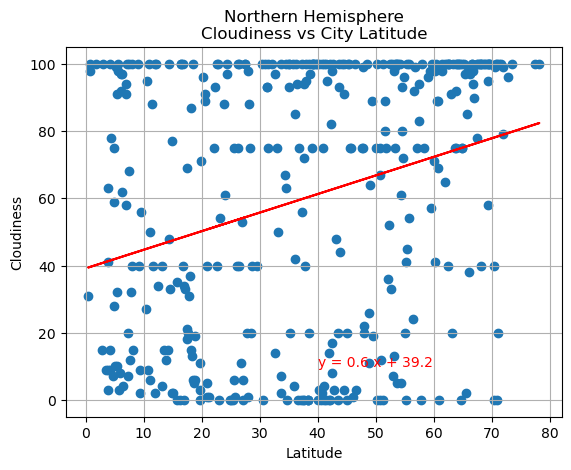

In [97]:
# Northern Hemisphere

plt.title("Northern Hemisphere" "\n" "Cloudiness vs City Latitude")

x_value = N_Hemi_df ["Lat"]
y_value = N_Hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

linear_regression(x_value,y_value, 'Cloudiness', (40,10))

The r-squared is: 0.30400848161206767


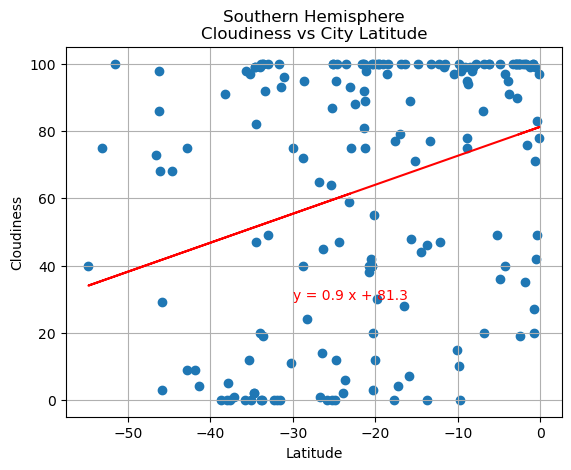

In [100]:
# Southern Hemisphere

plt.title("Southern Hemisphere" "\n" "Cloudiness vs City Latitude")

x_value = S_Hemi_df ["Lat"]
y_value = S_Hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

linear_regression(x_value,y_value, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** Though not strong, there is consistent relationship on both Northern and Southern hemispheres between Cloudiness and Latitudes, both displaying positive slopes. The Northern Hemisphere has an r-value of: 0.292, while the Southern Hemisphere has an r-value of:0.304.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.15215050503313016


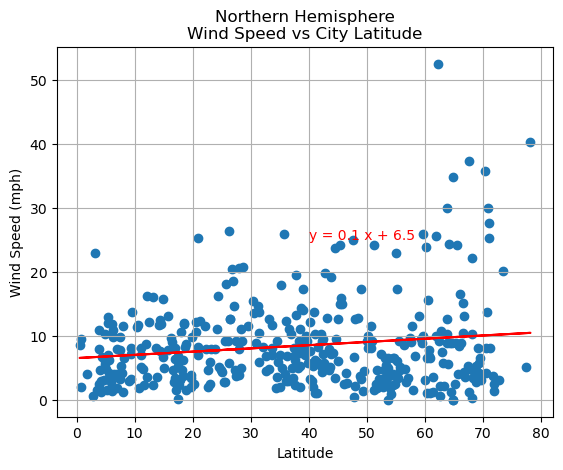

In [104]:
# Northern Hemisphere

plt.title("Northern Hemisphere" "\n" "Wind Speed vs City Latitude")

x_value = N_Hemi_df ["Lat"]
y_value = N_Hemi_df ['Wind Speed']
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

linear_regression(x_value,y_value, 'Wind Speed', (40,25))


The r-squared is: -0.2889396829246282


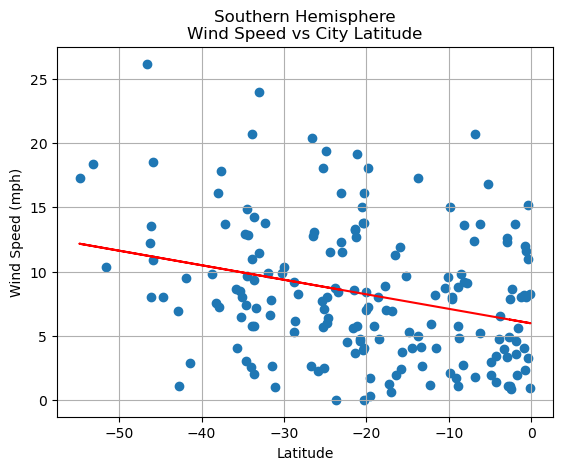

In [103]:
# Southern Hemisphere

plt.title("Southern Hemisphere" "\n" "Wind Speed vs City Latitude")

x_value = S_Hemi_df ["Lat"]
y_value = S_Hemi_df ["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

linear_regression(x_value,y_value, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** The northern hemisphere shows no relationship between Wind Speeds and Latitudes with and r-value of: 0.152, whilere the southern hemisphere shows a slightly stronger relationship in the negative direction with an r-value of: -0.288.